# ROC

In [1]:
!wget https://storage.googleapis.com/machine-learning-course-datasets/mnist_mnist_train_sample.csv -O /tmp/train.csv

--2019-06-01 06:18:16--  https://storage.googleapis.com/machine-learning-course-datasets/mnist_mnist_train_sample.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1827725 (1.7M) [application/octet-stream]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]   1.74M  --.-KB/s    in 0.01s   

2019-06-01 06:18:17 (127 MB/s) - ‘/tmp/train.csv’ saved [1827725/1827725]



In [0]:
number_of_columns=240

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("/tmp/train.csv")
data=data[data["label"]<2]
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:number_of_columns]], data["label"], train_size=100, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
probs = zip(classifier.predict(X_test)-np.array(y_test).flatten(), classifier.predict_proba(X_test))
probs = sorted(list(probs), key=(lambda x: x[1][0]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
i=0
tp=0
fp=0
tpr=[0.0]
fpr=[0.0]
for result, prob in probs:
  if result==0:
    tp+=1
  elif result==1:
    fp+=1
  i+=1
  tpr.append(tp/len(probs))
  fpr.append(fp/len(probs))

tpr.append(1.0)
fpr.append(1.0)

In [0]:
plot_fprs = [i/100 for i in range(100)]
plot_tprs = []
i=0
for plot_fpr in plot_fprs:
  while fpr[i]<=plot_fpr:
    i+=1
  plot_tprs.append(tpr[i-1])
plot_fprs.append(1.0)
plot_tprs.append(1.0)

No handles with labels found to put in legend.


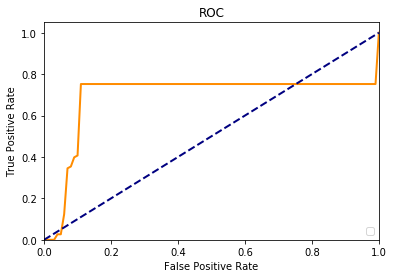

In [8]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(plot_fprs, plot_tprs, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()